In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#Set the font family and size to use for Matplotlib figures
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
#Set parameters
nx = 41
ny = 41
xmin, xmax = 0.0, 1.0
ymin, ymax = -0.5, 0.5
Lx = (xmax - xmin)
Ly = (ymax - ymin)
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

#Create the gridline locations
x = numpy.linspace(xmin, xmax, num=nx)
y = numpy.linspace(ymin, ymax, num=ny)

In [4]:
def poisson_source(x, y, Lx, Ly):
    #Compute and returns the source term(right-hand side) of the poisson equation
    #x(numpy.ndarray) The gridline location in the x direction as a 1D array of floats
    #y(numpy.ndarray) The gridline location in the y direction as a 1D array of floats
    #Lx(float) Domain length in the x direction
    #Ly(float) Domain length in the y direction
    #Return b(numpy.ndarray of floats) The forcing function as a 2D array
    X,Y = numpy.meshgrid(x, y)
    b = (-2.0 * numpy.pi / Lx *numpy.pi / Ly * numpy.sin(numpy.pi * X/ Lx) * numpy.cos(numpy.pi * Y / Ly))
    return b

In [5]:
def l2_norm(p, p_ref):
    #Compute and returns the relative L2_norm of the difference between a solution p and a reference solution p_ref
    #p(numpy.ndarray) The solution as an array of floats
    #p_ref(numpy.ndarray) The reference solution as an array of floats
    #Returns diff(float) The relative L2-norm of the difference
    l2_diff = (numpy.sqrt(numpy.sum((p - p_ref)**2)) / numpy.sqrt(numpy.sum(p_ref**2)))
    return l2_diff

In [6]:
def poisson_2d_jacobi(p0, b, dx, dy, maxiter=20000, rtol=1e-6):
    #SDolves the 2D Poisson equation for a given forcing term using Jacobi relaxation method
    #p0(numpy.ndarray) The initial solution as a 2D array of floats
    #b(numpy.ndarray) The forcing term as a 2D array of floats
    #dx(float) Grid spacing in the x direction
    #dy(float) Grid spacing in the y direction
    #maxiter(integer, optional) Maximum number of iterations to perform
    #rtol(float, optional) Relative tolerance for convergence
    #Returns
    #p(numpy.ndarray) The solution after relaxation as a 2D array of floats
    #ite(integer) The number of iterations performed
    #conv(list) The convergence history as a list of floats
    p = p0.copy()
    conv = []
    diff = rtol + 1.0#initial difference
    ite = 0#iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1,1:-1] = (((pn[1:-1, :-2] + pn[1:-1,2:]) * dy**2 + 
                         (pn[:-2,1:-1] + pn[2:,1:-1]) * dx**2 -
                         b[1:-1,1:-1] * dx**2 * dy**2) / (2.0 * (dx**2 + dy**2)))
        #Dirichlet boundary conditions at automatically enforced
        #Compute and record the relative L2_norm of the difference
        diff = l2_norm(p,pn)
        conv.append(diff)
        ite += 1
    return p, ite, conv

In [9]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [10]:
def plot_3d(x, y, p, label='$z$', elev=30.0, azim=45.0):
    #Create a Matplotlib figure with a 3D surface plot of the scalar field p
    #x(numpy.ndarray) Gridline locations in the x direction as a 1D array of floats
    #y(numpy.ndarray) Gridline locations in the y direction as a 1D array of floats
    #p(numpy.ndarray) Scalar field to plot as a 2D array of floats
    fig = pyplot.figure(figsize=(8.0,6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, p , cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim = azim)

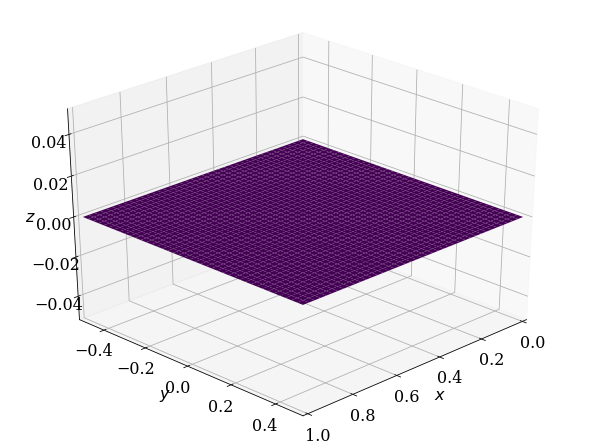

In [11]:
#Set the initial conditions
p0 = numpy.zeros((ny, nx))

#Compute the source term
b = poisson_source(x, y, Lx, Ly)

#Plot the initial scalar field
plot_3d(x, y, p0)

In [12]:
#Compute the solution using Jacobi relaxation method
p, ites, conv = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)
print('Jacobi relaxation: {} iterations'.format(ites) + 'to reach a relative difference of {}'.format(conv[-1]))

C:\Users\52679\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


Jacobi relaxation: 3125 iterationsto reach a relative difference of 1.9958631078740742e-07


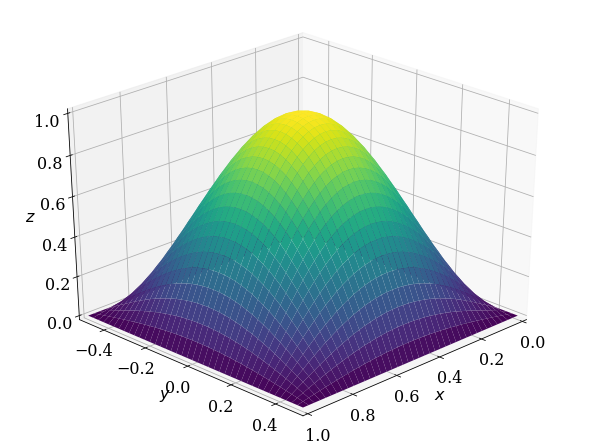

In [13]:
#Plot the solution 
plot_3d(x, y, p)

In [14]:
def poisson_solution(x, y, Lx, Ly):
    #Compute and returns the analytical solution of the Poisson equation on a given two-dimensional Cartesian grid
    
    #x(numpy.ndarray) The gridline locations in the x direction as a 1D array of floats
    #y(numpy.ndarray) The gridline locations in the y direction as a 1D array of floats
    #Lx(float) Length of the domain in the x direction
    #Ly(float) Length of the domain in the y direction
    #Returns p(numpy.ndarray) The analytical sdolution as a 2D array of floats
    X, Y  = numpy.meshgrid(x, y)
    p = numpy.sin(numpy.pi * X / Lx) * numpy.cos(numpy.pi * Y / Ly)
    return p

In [15]:
#Compute the analytical solution
p_exact = poisson_solution(x, y, Lx, Ly)

In [16]:
#Compute the relative L2-norm of the error
l2_norm(p,p_exact)

0.00044962635351969427

(0, 3125)

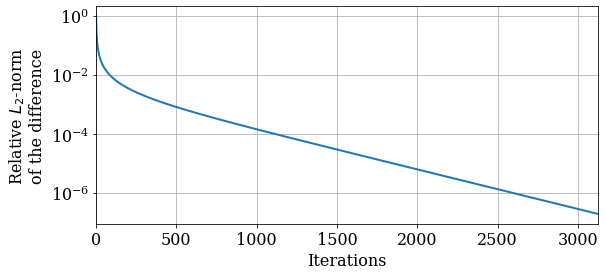

In [17]:
#Plot the convergence history
pyplot.figure(figsize = (9.0, 4.0))
pyplot.xlabel('Iterations')
pyplot.ylabel('Relative $L_2$-norm\nof the difference')
pyplot.grid()
pyplot.semilogy(conv, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0, len(conv))

In [18]:
#List of the grid sizes to investigate
nx_values = [11, 21, 41, 81]

#Create an empty list to record the error on each grid
errors = []

#Compute the solution and error for each grid size
for nx in nx_values:
    ny = nx
    dx = Lx / (nx - 1)
    dy = Ly / (ny - 1)
    #Create the gridline locations
    x = numpy.linspace(xmin, xmax, num=nx)
    y = numpy.linspace(ymin, ymax, num=ny)
    #Set the initial conditions
    p0 = numpy.zeros((ny, nx))
    #Compute the source term
    b = poisson_source(x, y, Lx, Ly)
    #Relax the solution
    #We do not return number of iterations
    #or the convergence history
    p, ites, _ = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)
    print('[nx = {}] Number of Jacobi iterations: {}'.format(nx, ites))
    #Compute the analytical solution
    p_exact = poisson_solution(x, y, Lx, Ly)
    #Compute and record the relative L2-norm of the error
    errors.append(l2_norm(p, p_exact))

C:\Users\52679\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


[nx = 11] Number of Jacobi iterations: 249
[nx = 21] Number of Jacobi iterations: 892
[nx = 41] Number of Jacobi iterations: 3125
[nx = 81] Number of Jacobi iterations: 10708


(0.01126563078263538,
 0.11095694720678449,
 0.00010607172406233507,
 0.010165674487730616)

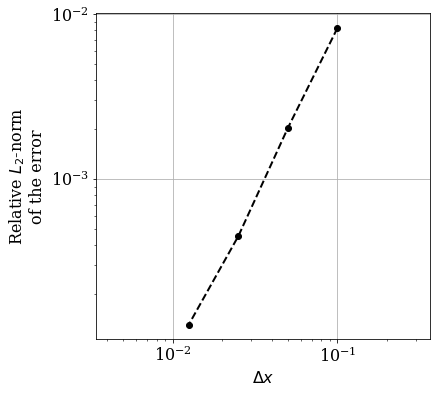

In [20]:
#Plot the error versus the grid-spacing size
pyplot.figure(figsize=(6.0,6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors, color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal')